In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(20, '/home/nicolas/anaconda2/lib/python2.7/site-packages')
import datashader as ds
import datashader.transfer_functions as tf

data = pd.read_csv("./asm_data_for_ml.txt", sep='\t')
data_plot = pd.DataFrame({'x':data['rateC'] / data['rateA'], 'y':data['rate']})
data['rateCA'] = data.rateC / data.rateA
data['rateCB'] = data.rateC / data.rateB
data['rateBA'] = data.rateB / data.rateA

probs= [[  1.07914408e-005   6.48680820e-012   9.99989209e-001]
 [  5.58958117e-003   5.66003406e-026   9.94410419e-001]
 [  3.21418943e-006   3.67947242e-002   9.63202062e-001]
 ..., 
 [  1.00000000e+000   0.00000000e+000   8.35610684e-212]
 [  1.00000000e+000   0.00000000e+000   4.24236934e-296]
 [  1.00000000e+000   0.00000000e+000   4.69682130e-293]]


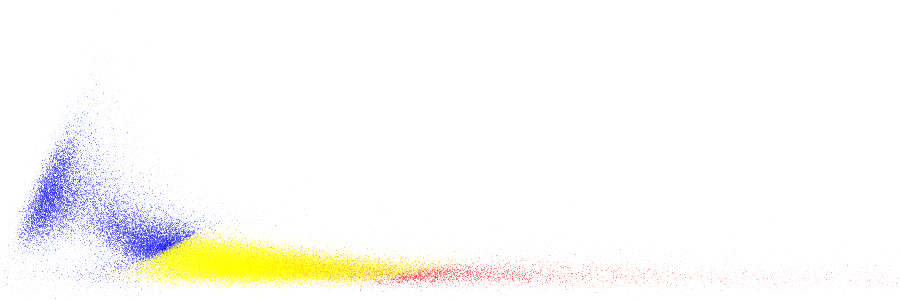

In [2]:
from pomegranate import GeneralMixtureModel
from pomegranate import NormalDistribution, MultivariateGaussianDistribution

X = np.c_[data.orbit, data.rateA, data.rateB, data.rateC, data.rate, data.rateCA]

#a = NormalDistribution.from_samples(X[:100])       # doesnt work with fit method
#b = NormalDistribution.from_samples(X[500:600])    # doesnt work with fit method
#c = NormalDistribution.from_samples(X[1000:1100])  # doesnt work with fit method

#a = NormalDistribution(np.zeros((6,)), np.diag((6, 6)))
#b = NormalDistribution(np.ones(6), np.diag((6, 6)))
#c = NormalDistribution(np.array([0] * 3 + [1] * 3), np.diag((6, 6)))

#print a

#gmm = GeneralMixtureModel([a, b, c], n_components=3)
#gmm = GeneralMixtureModel(NormalDistribution, n_components=3)  # doesnt work
#gmm = GeneralMixtureModel([NormalDistribution(5, 2), NormalDistribution(1, 2)])
gmm = GeneralMixtureModel(MultivariateGaussianDistribution, n_components=3)

gmm.fit(X)
preds = gmm.predict(X)
probs = gmm.predict_proba(X)
print 'probs=', probs

data['preds'] = pd.Series(preds).astype("category")
color_key = ['red', 'blue', 'yellow']

cvs = ds.Canvas(plot_height=300, plot_width=900, x_range=[0, 5], y_range=[0, 200])

agg = cvs.points(data, 'rateCA', 'rate', ds.count_cat('preds'))

tf.colorize(agg, color_key)


In [3]:
# Hmm with 3 components:

# looks better with data.rateCA in X
# looks like 3 is better than 4 components

from pomegranate import HiddenMarkovModel
from pomegranate import State, Distribution

X = np.c_[data.orbit, data.rateA, data.rateB, data.rateC, data.rate, data.rateCA]

#s1 = State( Distribution( NormalDistribution(1, 7) ), name="M1" )
#s2 = State( Distribution( NormalDistribution(2, 7) ), name="M2" )
#s3 = State( Distribution( NormalDistribution(3, 7) ), name="M3" )

X_1 = X[:1000]
X_2 = X[1000:2000]
X_3 = X[2000:3000]
a = MultivariateGaussianDistribution.from_samples(X_1)   
b = MultivariateGaussianDistribution.from_samples(X_2)  
c = MultivariateGaussianDistribution.from_samples(X_3)
s1 = State(a, name="M1" )
s2 = State(b, name="M2" )
s3 = State(c, name="M3" )

#s1 = State( MultivariateGaussianDistribution( np.arange(6) * 5, np.eye(6) ), name="M1" )
#s2 = State( MultivariateGaussianDistribution( np.ones(6) * 5, 2 * np.eye(6) ), name="M2" )
#s3 = State( MultivariateGaussianDistribution( np.ones(6) * 10, 5 * np.eye(6) ), name="M3" )

hmm = HiddenMarkovModel()
hmm.add_states(s1, s2, s3)
hmm.add_transition( hmm.start, s1, 0.5 )
hmm.add_transition( hmm.start, s3, 0.5 )
hmm.add_transition( s1, s1, 0.8 )
hmm.add_transition( s1, s2, 0.2 )
hmm.add_transition( s2, s1, 0.5 )
hmm.add_transition( s2, s3, 0.5 )
hmm.add_transition( s3, s3, 0.8 )
hmm.add_transition( s3, s2, 0.2 )
hmm.bake()

In [4]:
hmm.fit(X)  #, algorithm='viterbi')

Training improvement: 32591156.824
Training improvement: 80822.880065
Training improvement: 27302.6095826
Training improvement: 15232.7433793
Training improvement: 11218.7751083
Training improvement: 8820.22496268
Training improvement: 7449.94988902
Training improvement: 6882.04153952
Training improvement: 6839.85859655
Training improvement: 5794.8773306
Training improvement: 4283.97445094
Training improvement: -14448.7978281
Total Training Improvement: 32751355.9611


32751355.9610599

In [5]:
hmm.predict(X)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


[[  1.00000001e+000   0.00000000e+000   1.01938420e-012]
 [  9.96090646e-001   3.90936353e-003   5.63074400e-035]
 [  9.99045717e-001   9.54276241e-004   1.54934430e-008]
 ..., 
 [  2.91430663e-084   1.00000000e+000   0.00000000e+000]
 [  1.00000000e+000   1.54495457e-187   0.00000000e+000]
 [  2.03197222e-101   1.00000000e+000   0.00000000e+000]]


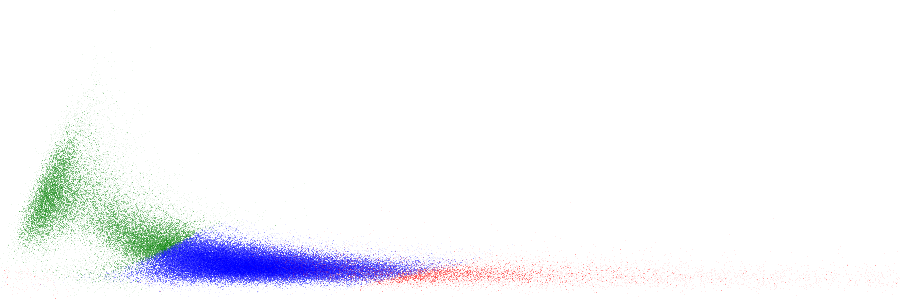

In [7]:
#preds = hmm.viterbi(S)
#preds = hmm.predict_proba(S)
print(hmm.predict_proba(X))
#preds = hmm.predict(list(X), algorithm='map')
#probs = hmm.predict_proba(X)

#print hmm.score(X)

color_key = ['red', 'green', 'blue', 'yellow']

data['preds'] = pd.Series(preds).astype("category")

cvs = ds.Canvas(plot_height=300, plot_width=900, x_range=[0, 5], y_range=[0, 200])
agg = cvs.points(data, 'rateCA', 'rate', ds.count_cat('preds'))

tf.colorize(agg, color_key)

In [ ]:
# bug snippet

import numpy as np
from pomegranate import MultivariateGaussianDistribution, State, HiddenMarkovModel

s1 = State(MultivariateGaussianDistribution(np.arange(6), np.eye(6)), name="S1" )
s2 = State(MultivariateGaussianDistribution(np.ones(6), 2 * np.eye(6)), name="S2" )
s3 = State(MultivariateGaussianDistribution(10 * np.ones(6), 5 * np.eye(6)), name="S3")

hmm = HiddenMarkovModel()
hmm.add_states(s1, s2, s3)
hmm.add_transition( hmm.start, s1, 0.5 )
hmm.add_transition( hmm.start, s3, 0.5 )
hmm.add_transition( s1, s1, 0.8 )
hmm.add_transition( s1, s2, 0.2 )
hmm.add_transition( s2, s1, 0.5 )
hmm.add_transition( s2, s3, 0.5 )
hmm.add_transition( s3, s3, 0.8 )
hmm.add_transition( s3, s2, 0.2 )
hmm.bake()

S = hmm.sample(5)
print "S=", S
hmm.fit(S)
hmm.predict(S)